In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.externals import joblib

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
dataset= pd.read_csv('startup_funding3.csv')
dataset

,Sr No,Date dd/mm/yyyy,City Location,Startup Name,Industry Vertical,Amount in USD
0,1,09-01-2020,Bengaluru,BYJU’S,E-Tech,"20,00,00,000"
1,2,13-01-2020,Gurgaon,Shuttl,Transportation,"80,48,394"
2,3,09-01-2020,Bengaluru,Mamaearth,E-commerce,"1,83,58,860"
3,4,02-01-2020,New Delhi,https://www.wealthbucket.in/,FinTech,"30,00,000"
4,5,02-01-2020,Mumbai,Fashor,Fashion and Apparel,"18,00,000"
...,...,...,...,...,...,...
995,996,02-02-2017,Pune,Clodura,Technology,NaN
996,997,03-02-2017,Hyderabad,Stockroom.io,Consumer Internet,NaN
997,998,06-02-2017,Bangalore,Capital Float,Consumer Internet,"25,00,000"
998,999,06-02-2017,Kolkata,iManageMyHotel,Technology,NaN


In [3]:
dataset.isnull().any()

Sr No                False
Date dd/mm/yyyy      False
City  Location        True
Startup Name         False
Industry Vertical    False
Amount in USD         True
dtype: bool

In [4]:
dataset['City  Location'].fillna('Bengaluru',inplace=True)
dataset

,Sr No,Date dd/mm/yyyy,City Location,Startup Name,Industry Vertical,Amount in USD
0,1,09-01-2020,Bengaluru,BYJU’S,E-Tech,"20,00,00,000"
1,2,13-01-2020,Gurgaon,Shuttl,Transportation,"80,48,394"
2,3,09-01-2020,Bengaluru,Mamaearth,E-commerce,"1,83,58,860"
3,4,02-01-2020,New Delhi,https://www.wealthbucket.in/,FinTech,"30,00,000"
4,5,02-01-2020,Mumbai,Fashor,Fashion and Apparel,"18,00,000"
...,...,...,...,...,...,...
995,996,02-02-2017,Pune,Clodura,Technology,NaN
996,997,03-02-2017,Hyderabad,Stockroom.io,Consumer Internet,NaN
997,998,06-02-2017,Bangalore,Capital Float,Consumer Internet,"25,00,000"
998,999,06-02-2017,Kolkata,iManageMyHotel,Technology,NaN


In [5]:
dataset['Amount in USD'].fillna('9,00,000',inplace=True)
dataset

,Sr No,Date dd/mm/yyyy,City Location,Startup Name,Industry Vertical,Amount in USD
0,1,09-01-2020,Bengaluru,BYJU’S,E-Tech,"20,00,00,000"
1,2,13-01-2020,Gurgaon,Shuttl,Transportation,"80,48,394"
2,3,09-01-2020,Bengaluru,Mamaearth,E-commerce,"1,83,58,860"
3,4,02-01-2020,New Delhi,https://www.wealthbucket.in/,FinTech,"30,00,000"
4,5,02-01-2020,Mumbai,Fashor,Fashion and Apparel,"18,00,000"
...,...,...,...,...,...,...
995,996,02-02-2017,Pune,Clodura,Technology,"9,00,000"
996,997,03-02-2017,Hyderabad,Stockroom.io,Consumer Internet,"9,00,000"
997,998,06-02-2017,Bangalore,Capital Float,Consumer Internet,"25,00,000"
998,999,06-02-2017,Kolkata,iManageMyHotel,Technology,"9,00,000"


In [6]:
dataset.isnull().any()

Sr No                False
Date dd/mm/yyyy      False
City  Location       False
Startup Name         False
Industry Vertical    False
Amount in USD        False
dtype: bool

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoding_y=LabelEncoder()
dataset['Startup Name']=labelencoding_y.fit_transform(dataset['Startup Name'])

In [8]:
dataset

,Sr No,Date dd/mm/yyyy,City Location,Startup Name,Industry Vertical,Amount in USD
0,1,09-01-2020,Bengaluru,61,E-Tech,"20,00,00,000"
1,2,13-01-2020,Gurgaon,662,Transportation,"80,48,394"
2,3,09-01-2020,Bengaluru,445,E-commerce,"1,83,58,860"
3,4,02-01-2020,New Delhi,858,FinTech,"30,00,000"
4,5,02-01-2020,Mumbai,240,Fashion and Apparel,"18,00,000"
...,...,...,...,...,...,...
995,996,02-02-2017,Pune,129,Technology,"9,00,000"
996,997,03-02-2017,Hyderabad,702,Consumer Internet,"9,00,000"
997,998,06-02-2017,Bangalore,104,Consumer Internet,"25,00,000"
998,999,06-02-2017,Kolkata,863,Technology,"9,00,000"


In [9]:
dataset['Industry Vertical']=labelencoding_y.fit_transform(dataset['Industry Vertical'])

In [10]:
dataset

,Sr No,Date dd/mm/yyyy,City Location,Startup Name,Industry Vertical,Amount in USD
0,1,09-01-2020,Bengaluru,61,26,"20,00,00,000"
1,2,13-01-2020,Gurgaon,662,89,"80,48,394"
2,3,09-01-2020,Bengaluru,445,27,"1,83,58,860"
3,4,02-01-2020,New Delhi,858,41,"30,00,000"
4,5,02-01-2020,Mumbai,240,38,"18,00,000"
...,...,...,...,...,...,...
995,996,02-02-2017,Pune,129,87,"9,00,000"
996,997,03-02-2017,Hyderabad,702,17,"9,00,000"
997,998,06-02-2017,Bangalore,104,17,"25,00,000"
998,999,06-02-2017,Kolkata,863,87,"9,00,000"


In [11]:
dataset['City  Location']=labelencoding_y.fit_transform(dataset['City  Location'])
dataset

,Sr No,Date dd/mm/yyyy,City Location,Startup Name,Industry Vertical,Amount in USD
0,1,09-01-2020,6,61,26,"20,00,00,000"
1,2,13-01-2020,22,662,89,"80,48,394"
2,3,09-01-2020,6,445,27,"1,83,58,860"
3,4,02-01-2020,40,858,41,"30,00,000"
4,5,02-01-2020,36,240,38,"18,00,000"
...,...,...,...,...,...,...
995,996,02-02-2017,46,129,87,"9,00,000"
996,997,03-02-2017,25,702,17,"9,00,000"
997,998,06-02-2017,5,104,17,"25,00,000"
998,999,06-02-2017,32,863,87,"9,00,000"


In [12]:
x=dataset.iloc[:,3:5].values
x

array([[ 61,  26],
       [662,  89],
       [445,  27],
       ...,
       [104,  17],
       [863,  87],
       [372,  17]])

In [13]:
y=dataset.iloc[:,3].values
y=y.reshape(-1,1)
y

array([[ 61],
       [662],
       [445],
       [858],
       [240],
       [553],
       [847],
       [201],
       [105],
       [173],
       [623],
       [331],
       [420],
       [362],
       [754],
       [614],
       [414],
       [268],
       [469],
       [710],
       [ 98],
       [331],
       [514],
       [ 57],
       [711],
       [131],
       [849],
       [178],
       [452],
       [798],
       [272],
       [560],
       [190],
       [770],
       [731],
       [225],
       [111],
       [177],
       [  4],
       [  7],
       [496],
       [ 44],
       [275],
       [802],
       [105],
       [593],
       [494],
       [ 34],
       [576],
       [456],
       [107],
       [774],
       [835],
       [425],
       [719],
       [357],
       [348],
       [ 25],
       [468],
       [300],
       [607],
       [617],
       [ 43],
       [818],
       [533],
       [774],
       [163],
       [  0],
       [475],
       [224],
       [368],
      

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_x = StandardScaler()

In [18]:
x_train = sc_x.fit_transform(x_train)

In [19]:
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()

In [20]:
y_train = sc_y.fit_transform(y_train)

In [21]:
from sklearn.cluster import KMeans
wcss = []

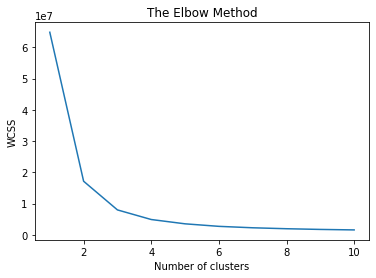

In [22]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

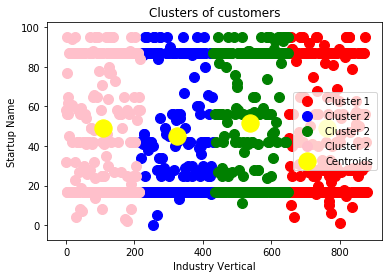

In [24]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Industry Vertical')
plt.ylabel('Startup Name')
plt.legend()
plt.show()

In [26]:
from joblib import dump
dump(y_kmeans,"kmeans1.save")

['kmeans1.save']